In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
# current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


In [4]:
import gc
import datetime

%matplotlib inline
color = sns.color_palette()

In [5]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [7]:
df = pd.read_csv(r'C:\Users\ragha\Desktop\data(CLEAN).csv')
df.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,01-12-2010 08:26,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,01-12-2010 08:26,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,01-12-2010 08:26,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,01-12-2010 08:26,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,01-12-2010 08:26,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


In [8]:
df.shape

(397924, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   397924 non-null  int64  
 1   invoice_date  397924 non-null  object 
 2   year_month    397924 non-null  int64  
 3   month         397924 non-null  int64  
 4   day           397924 non-null  int64  
 5   hour          397924 non-null  int64  
 6   stock_code    397924 non-null  object 
 7   description   397924 non-null  object 
 8   quantity      397924 non-null  int64  
 9   unit_price    397924 non-null  float64
 10  amount_spent  397924 non-null  float64
 11  cust_id       397924 non-null  int64  
 12  country       397924 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 39.5+ MB


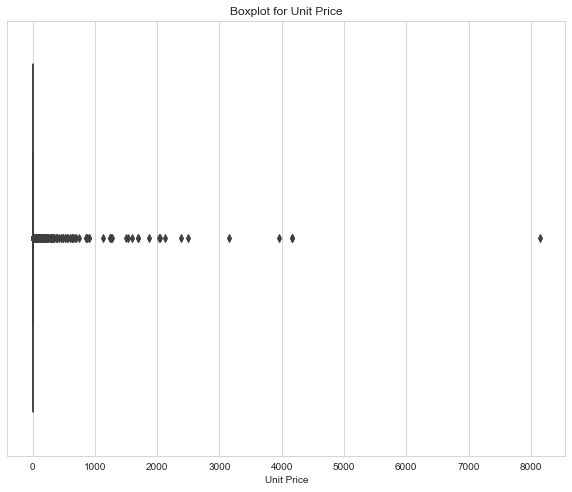

In [10]:
#Boxplot - Range of unit price

plt.subplots(figsize=(10,8))
sns.boxplot(df.unit_price)

plt.xlabel('Unit Price')
plt.title('Boxplot for Unit Price')
plt.show()    

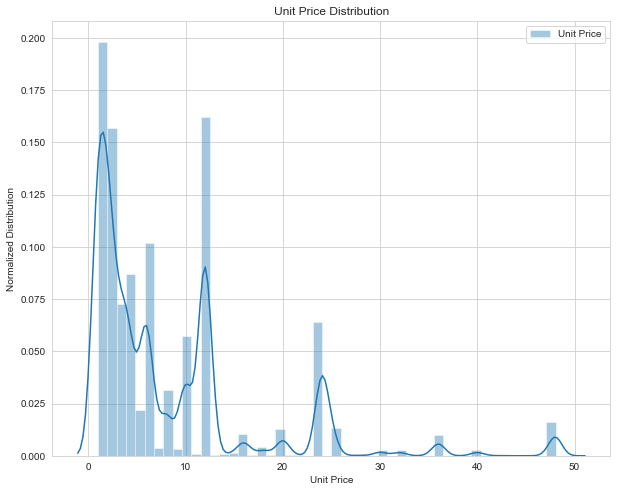

In [11]:
#Distribution plot - Unit price
# Unit price distribition plot

plt.subplots(figsize=(10,8))
sns.distplot(df.quantity[df.quantity < 50], label='Unit Price').legend()

plt.xlabel('Unit Price')
plt.ylabel('Normalized Distribution')
plt.title('Unit Price Distribution')
plt.show()

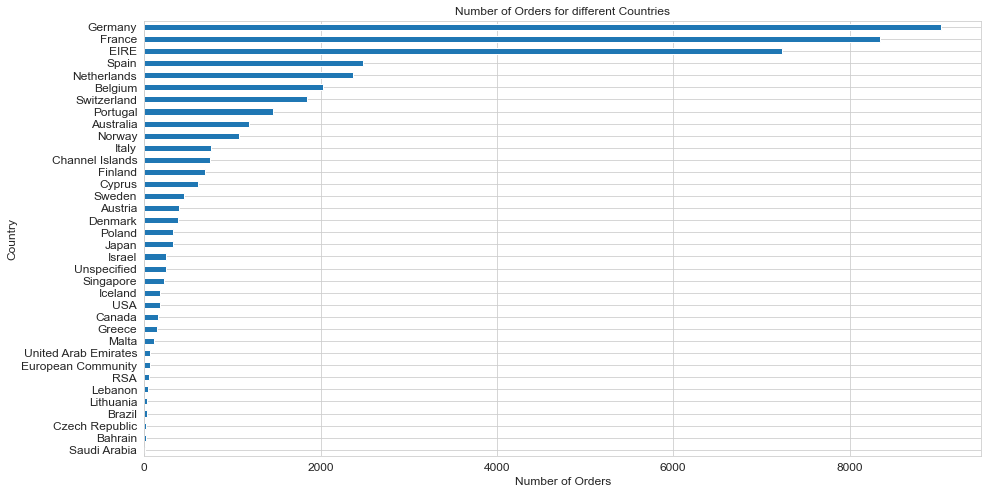

In [14]:
#Bar chart - Number of orders for each country
group_country_orders = df.groupby('country')['invoice_num'].count().sort_values()
del group_country_orders['United Kingdom'] # for illustration purpose

# plot number of orders in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

In [15]:
#Number of orders per day
df.groupby('invoice_num')['day'].unique().value_counts().sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: day, dtype: int64

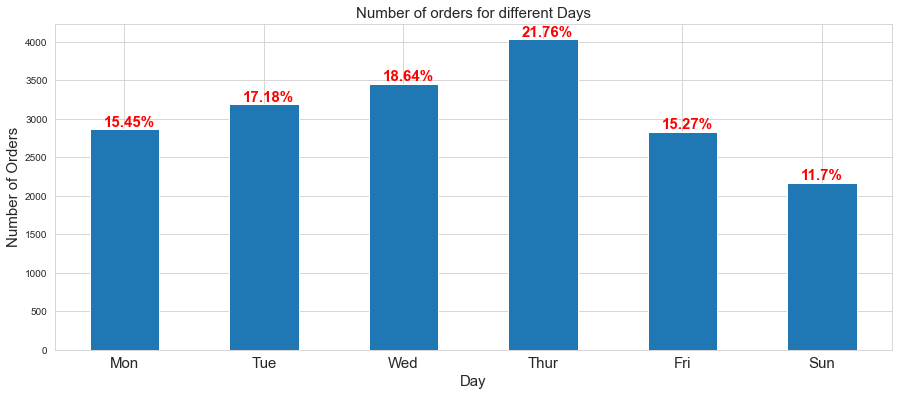

In [17]:
ax = df.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind ='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)

#-------------------------------------------------
# Annotate bar chart with percentage

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height()+40, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                fontweight='bold', color='red')
plt.show()

In [18]:
#Bar chart & line plot

df.groupby(by=['year_month'])['amount_spent'].sum().index.tolist()[1:]

[201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112]

In [19]:
df.groupby(by=['year_month'])['amount_spent'].sum()[1:]

year_month
201101     569445.040
201102     447137.350
201103     595500.760
201104     469200.361
201105     678594.560
201106     661213.690
201107     600091.011
201108     645343.900
201109     952838.382
201110    1039318.790
201111    1161817.380
201112     518192.790
Name: amount_spent, dtype: float64

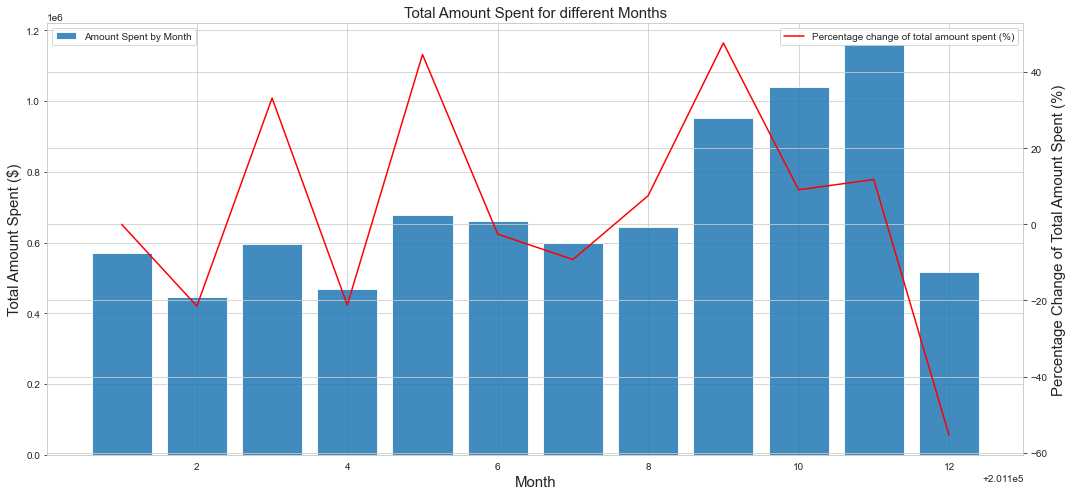

In [20]:
fig = plt.figure(figsize=(15, 7))
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Month',fontsize=15)
ax1.set_ylabel('Total Amount Spent ($)',fontsize=15)
ax1.set_title('Total Amount Spent for different Months',fontsize=15)
ax1.bar(df.groupby(by=['year_month'])['amount_spent'].sum().index.tolist()[1:],
        df.groupby(by=['year_month'])['amount_spent'].sum()[1:],
        alpha=0.85,
        label='Amount Spent by Month')
#----------------
ax2 = ax1.twinx()
ax2.set_ylabel('Percentage Change of Total Amount Spent (%)',fontsize=15)
ax2.plot(df.groupby(by=['year_month'])['amount_spent'].sum().index.tolist()[1:], 
         df.groupby(by=['year_month'])['amount_spent'].sum()[1:].pct_change().fillna(0)*100,
         label='Percentage change of total amount spent (%)',
         color='red')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()
plt.show()